In [ ]:
import pickle


In [53]:
with open('my_dict.pkl', 'rb') as f:
    result = pickle.load(f)
with open('my_dict1.pkl', 'rb') as f:
    result2 = pickle.load(f)
with open('ga_result_mu_rate_1.pkl', 'rb') as f:
    result3 = pickle.load(f)
with open('graph.pkl', 'rb') as f:
    graph = pickle.load(f)


In [ ]:
# 변수 설정
time_set = dict()
time_set['start_time'] = 9
time_set['end_time'] = 18
time_set['load_rest_time'] = 0.3

shortest_path_dict = graph.get_shortest_path_dict()

In [ ]:
def print_tp_block_num(transporter):
    for block in transporter.works:
        print(f'block_no: {block.no}, job: {block.start_node} -> {block.end_node}, limit_time: {block.start_time} -> {block.end_time}', end=' ')
    print()



In [ ]:
def fitness(individual, time_set, shortest_path_dict):
    start_time = time_set['start_time']
    end_time = time_set['end_time']
    load_rest_time = time_set['load_rest_time']
    total_time = 0  # 모든 트랜스포터가 일을 마치는 시간을 계산
    DOCK = 1 # 트랜스포터 시작 노드
    result = dict()
    fitness_score = 0
    empty_tp_score = 1000

    for transporter in individual:
        result[transporter.no] = []
        cur_time = start_time  # 작업을 시작할 수 있는 가장 빠른 시간
        cur_node = DOCK  # 현재 위치는 도크

        if not transporter.works:
            fitness_score += empty_tp_score
            if transporter.available_weight > 500:
                fitness_score += empty_tp_score // 100

        for block in transporter.works:
            # 트랜스포터 위치 -> 블록 시작 위치
            dist = shortest_path_dict[cur_node][block.start_node] / 1000  # 이전 위치에서 현재 블록까지 이동한 거리
            cur_time += dist / transporter.empty_speed  # 이동 시간 추가

            # 블록 시작 위치 -> 블록 적재 위치
            cur_time = max(cur_time, block.start_time)  # 블록의 작업 시작 시간 이전에 도착한 경우, 해당 시간까지 대기
            job_start_time = round(cur_time, 3)
            cur_time += (shortest_path_dict[block.start_node][block.end_node] / 1000) / transporter.work_speed  # 블록을 운반하는데 걸리는 시간 추가
            job_end_time = round(cur_time, 3)

            flag = "X"
            if  block.start_time <= job_start_time and job_end_time <= block.end_time:
                flag = "O"
            result[transporter.no].append({
                'block': block.no,
                'pos': f'{block.start_node} -> {block.end_node}',
                'limit_time': f'{block.start_time} -> {block.end_time}',
                'process_time': f'{job_start_time} -> {job_end_time}',
                '시간을 지켰나요?': flag,
            })

            # 블록 적재
            cur_time += load_rest_time
            cur_node = block.end_node  # 현재 위치를 블록의 종료 위치로 업데이트



        total_time = max(total_time, cur_time)  # 모든 트랜스포터가 일을 마치는 시간 업데이트


    fitness_score += 1 / total_time * 1

    for transporter in individual:
        if any(work.weight > transporter.available_weight for work in transporter.works):
            fitness_score *= 0.5

    if total_time >= end_time:  # 전체 작업 완료 시간이 18시를 초과하면 해당 해는 유효하지 않음
        fitness_score *= 0.5

    return result  # 전체 작업 완료 시간의 역수를 반환하여 적합도 계산

In [ ]:
re = fitness(result2['best_individual'], time_set, shortest_path_dict)

for key in re.keys():
    works = re[key]
    if re[key]:
        print(key)
        for block in re[key]:
            print(block)

In [ ]:
import matplotlib.pyplot as plt

# 2차원 리스트 생성 (3x3)
data = result2['similarity']
# data = [sorted(row, reverse=True) for row in data]
# 리스트의 크기 (row, col) 설정
num_rows = len(data)
num_cols = len(data[0])

# x축, y축 값 생성
x_values = list(range(num_cols))
y_values = list(range(num_rows))

# 그래프 크기 설정
plt.figure(figsize=(18, 13))

# 그래프 그리기
for i in range(num_rows):
    for j in range(num_cols):
        plt.plot(i, data[i][j], 'o', linewidth=2, markersize=2, alpha=0.8)



# 그래프 제목 설정
plt.title('2D List Plot', fontsize=16)

# 범례 표시
plt.legend(loc='upper left', fontsize=14)

# 그래프 표시
plt.show()


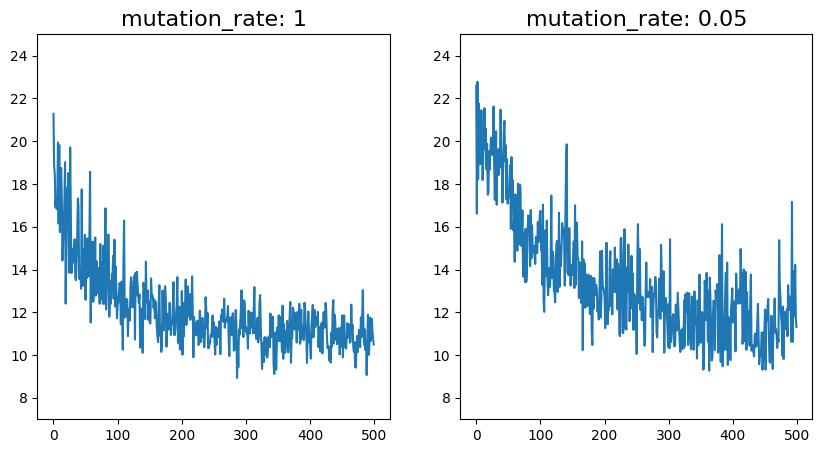

In [72]:
data3 = result3['similarity'] # mutation rate 1
data2 = result2['similarity'] # mutaiuon rate 0.05
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].plot(range(len(data3)), data3)
axs[0].set_ylim([7, 25])
axs[0].set_title("mutation_rate: 1",  fontsize=16)


axs[1].plot(range(len(data2)), data2)
axs[1].set_ylim([7, 25])
axs[1].set_title("mutation_rate: 0.05",  fontsize=16)

# 유사도가 작을 수록 변이가 높다
plt.show()